# Final Graph - 2019

Imports packages

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
from ipywidgets import interact, interactive
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
from IPython.display import display
import datetime

Reads the dataset into a dataframe, and groups the rows into every hour

In [9]:
import pandas as pd

df = pd.read_csv("https://data.smartdublin.ie/dataset/cc421859-1f4f-43f6-b349-f4ca0e1c60fa/resource/0e1ac985-3a45-4134-a696-32909a0310aa/download/dcc-2019-pedestrian-footfall-count-jan-dec_14082020.csv", 
parse_dates = ["Time"], index_col = "Time")
df = df.resample("H").sum()

df.head()

,O'Connell St Outside Pennys,O'Connell St Outside Clerys,Mary Street,Capel Street,Aston Quay,Grafton Street @ CompuB,Talbot Street North,"Doilier Street, Burgh Quay",Dawson Street Replacement,Dame Street,Talbot Street South,"O'Connell St, Parnell St @ AIB",Grafton Street / Nassau Street / Suffolk Street,"College Green, Bank Of Ireland",Henry Street,Westmoreland Street East,Dawson Street,Liffey Street,Westmoreland Street West,Grafton Street,Bachelors Walk,College Green @ Church Lane,College Green - Dame St Side
Time,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,1504,1914.0,163,238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,597.0,1670.0,255.0,881.0,1988.0,140.0,0.0,0.0,0.0
2019-01-01 01:00:00,1187,885.0,102,173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,359.0,767.0,209.0,723.0,1270.0,215.0,0.0,0.0,0.0
2019-01-01 02:00:00,1233,984.0,63,121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317.0,642.0,193.0,1010.0,1589.0,210.0,0.0,0.0,0.0
2019-01-01 03:00:00,1316,935.0,59,174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,313.0,582.0,178.0,772.0,1534.0,204.0,0.0,0.0,0.0
2019-01-01 04:00:00,802,390.0,46,82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172.0,143.0,35.0,197.0,610.0,88.0,0.0,0.0,0.0


Makes a new Dataframe with the values at 18:00

In [10]:
new_df = pd.DataFrame(columns=df.columns)

for index, row in df.iterrows():
  if index.hour == 18:
    new_df = new_df.append(row)

Finds the average for each week, and the times at the start of each week

In [18]:
def find_avg_week(street):
  current_week = 1
  weekly_averages = []
  total_week = 0
  for index, row in new_df.iterrows():
    if index.week == current_week:
      total_week += row[street]
    else:
      weekly_averages.append(total_week / 7)
      current_week = index.week
      total_week = row[street]
  return weekly_averages

def find_weeks():
  current_week = 0
  dates = []
  for index, row in new_df.iterrows():
    if current_week != index.week:
      dates.append(index)
      current_week += 1
  return dates[:-2]

weekly_dates = find_weeks()

Makes the streamgraph

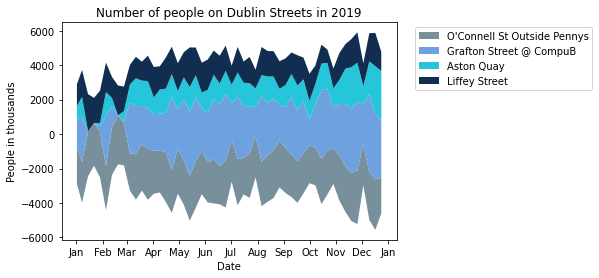

In [40]:
def make_streamgraph(streets, key_events):
  ax = plt.subplot()

  colour_map = ['#78909C', '#6DA1E0', '#26C6DA', '#112E51'] 
  ax.stackplot(weekly_dates, [find_avg_week(n) for n in streets], labels=streets, colors=colour_map, baseline='weighted_wiggle')

  months = MonthLocator()
  monthsFmt = DateFormatter("%b")
  ax.xaxis.set_major_locator(months)
  ax.xaxis.set_major_formatter(monthsFmt)


  plt.legend(bbox_to_anchor=(1.6, 1), loc='upper right')
  ax.set_title('Number of people on Dublin Streets in 2019')
  ax.set_ylabel('People in thousands')
  ax.set_xlabel('Date')

streets = ["O'Connell St Outside Pennys", "Grafton Street @ CompuB", "Aston Quay", "Liffey Street"]

make_streamgraph(streets, True)